In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load neuroscience publications
neuro_data = pd.read_csv('neuro_journals_doi.csv')

In [3]:
# replace long journal names
neuro_data = neuro_data.replace(to_replace={'Proceedings of the National Academy of Sciences':'PNAS'})

In [43]:
data_by_journal = neuro_data.groupby("journal").agg({"days_to_publish": ['mean', 'count', 'median']})
data_by_journal.columns = data_by_journal.columns.droplevel(0)
data_by_journal.shape

(655, 3)

In [26]:
# popular journals are the ones that have >30 publications
pop_journal = data_by_journal[data_by_journal['count']>30].sort_values(by='median',ascending=False)

# make new df with data from the most popular journals
pop_neuro_data = neuro_data[neuro_data['journal'].isin(pop_journal.index.to_list())]

# restrict to positive "days_to_publish"
npoppubs = pop_neuro_data.shape[0]
pop_neuro_data = pop_neuro_data[pop_neuro_data['days_to_publish']>0]
npoppubspos = pop_neuro_data.shape[0]
print(f"{npoppubs-npoppubspos} entries removed for negative publication time")

12 entries removed for negative publication time


## Publication time
### assumptions
* people post their preprints when they submit them for publication
* comparable to submission to publication time (includes both review + post-acceptance editing times)
* time can reflect submission and rejection from several journals, but will only count for the journal that it was finally published in

Text(0, 0.5, 'publish_date - preprint_date [days]')

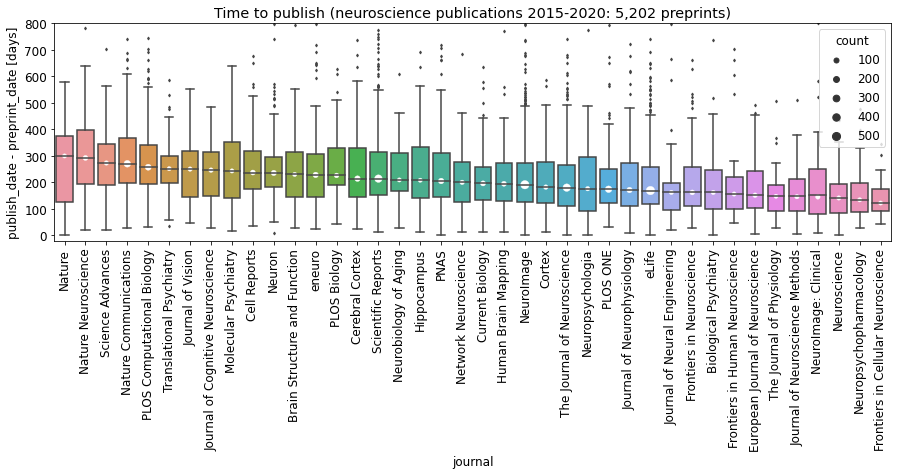

In [49]:
# plot length to publish per publisher
def rot_x_labels(g,rot):
    for label in g.axes.get_xticklabels():
        label.set_rotation(rot)
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(15,4))
#pop_journal.plot.barh()
#g = sns.violinplot(x='journal',y='days_to_publish', data=pop_neuro_data,order=pop_journal.index.to_list(),scale='count')
g = sns.boxplot(x='journal',y='days_to_publish', data=pop_neuro_data,
                order=pop_journal.index.to_list(),fliersize=2)
g = sns.scatterplot(x=pop_journal.reset_index().index,y='median',data = pop_journal,size='count',color='white') #s='count',

#g = sns.swarmplot(x="journal", y="days_to_publish", data=pop_neuro_data, color=".25")
rot_x_labels(g,90)
plt.ylim(-20,800)
plt.title(f"Time to publish (neuroscience publications 2015-2020: {pop_neuro_data.shape[0]:,} preprints)")
plt.ylabel('publish_date - preprint_date [days]')

([<matplotlib.axis.XTick at 0x7f9a8110b340>,
 [Text(0, 0, 'Nature'),
  Text(1, 0, 'Nature Neuroscience'),
  Text(2, 0, 'Science Advances'),
  Text(3, 0, 'Nature Communications'),
  Text(4, 0, 'PLOS Computational Biology'),
  Text(5, 0, 'Translational Psychiatry'),
  Text(6, 0, 'Journal of Vision'),
  Text(7, 0, 'Journal of Cognitive Neuroscience'),
  Text(8, 0, 'Molecular Psychiatry'),
  Text(9, 0, 'Cell Reports'),
  Text(10, 0, 'Neuron'),
  Text(11, 0, 'Brain Structure and Function'),
  Text(12, 0, 'eneuro'),
  Text(13, 0, 'PLOS Biology'),
  Text(14, 0, 'Cerebral Cortex'),
  Text(15, 0, 'Scientific Reports'),
  Text(16, 0, 'Neurobiology of Aging'),
  Text(17, 0, 'Hippocampus'),
  Text(18, 0, 'PNAS'),
  Text(19, 0, 'Network Neuroscience'),
  Text(20, 0, 'Current Biology'),
  Text(21, 0, 'Human Brain Mapping'),
  Text(22, 0, 'NeuroImage'),
  Text(23, 0, 'Cortex'),
  Text(24, 0, 'The Journal of Neuroscience'),
  Text(25, 0, 'Neuropsychologia'),
  Text(26, 0, 'PLOS ONE'),
  Text(27, 0, 'J

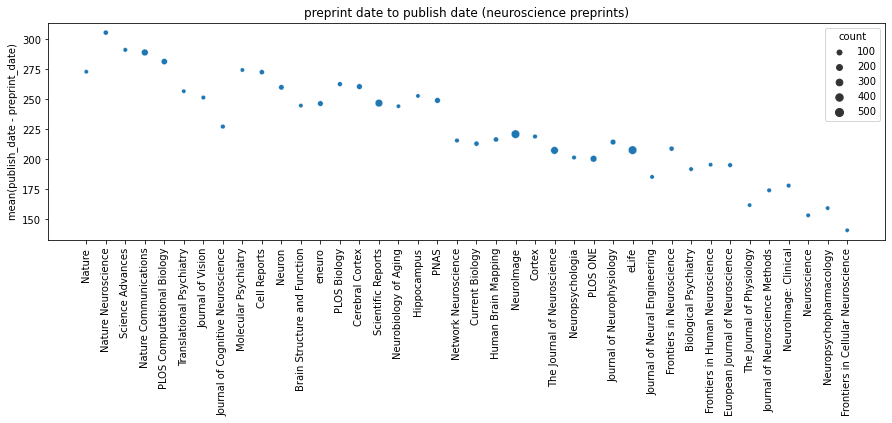

In [37]:
plt.figure(figsize=(15,4))
g = sns.barplot(x='journal',y='days_to_publish',data=pop_neuro_data,order=pop_journal.index.to_list())
g = sns.scatterplot(x=pop_journal.reset_index().index,y='mean',data = pop_journal,size='count') #s='count',
rot_x_labels(g,90)
plt.title('preprint date to publish date (neuroscience preprints)')
plt.ylabel('mean(publish_date - preprint_date)')
plt.xticks(pop_journal.reset_index().index,pop_journal.index.to_list())

In [32]:
pop_journal

,mean,count,median
journal,,,
Nature,272.944444,36,299.5
Nature Neuroscience,305.594059,101,292.0
Science Advances,291.215686,51,273.0
Nature Communications,289.045603,307,270.0
PLOS Computational Biology,281.435556,225,257.0
Translational Psychiatry,256.718750,32,251.5
Journal of Vision,251.415094,53,250.0
Journal of Cognitive Neuroscience,227.181818,66,246.0
Molecular Psychiatry,274.405405,37,243.0
